# Target Cities for Sociable CiderWerks 

Sociable CiderWerks is a cidery located in Minneapolis, Minnesota. With their growing popularity, they are looking to open a new cidery in a major metropolitan area outside of Minnesota. I want to analyze major cities around the United States to see what demographic features might make a city might be a good fit to open a new cider taproom successfully. 

I obtained demographic data from the US Census Bureau. First, I want to examine the demographics of all cities in the dataset to look for overarching demographic trends. I am most interested in demographics that will help a cider taproom be successful. Demographics of interest will be income, age, population, and the male/female breakdown of a city's population.  

### Income

It will be important to target cities where people have a large income, so that we know they have some disposable income to spend on craft cider.

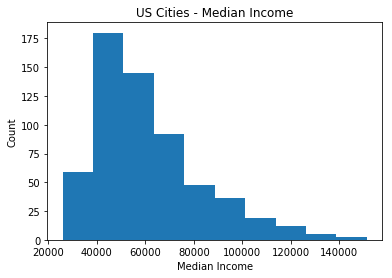

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read in data file from capstone project
dems_and_cider = pd.read_csv('dems_and_cider.csv')

# histogram - income 

median_income = dems_and_cider['Households_Estimate_Median_income_dollars']
mean_income = dems_and_cider['Households_Estimate_Mean_income_dollars']

plt.hist(median_income)
plt.xlabel('Median Income')
plt.ylabel('Count')
plt.title('US Cities - Median Income')
plt.show()


It looks like most people have an income falling in the range of $40,000 - $60,000 a year. This is not a surprising finding. The distribution is skewed right, with some cities having a median income of over $140,000 per year. My guess is that this is a suburb of San Francisco or Seattle. I will investigate the cities with the top incomes. 

In [3]:
dems_and_cider.sort_values('Households_Estimate_Median_income_dollars', ascending=False).head(5)

,Unnamed: 0,Id,Id2,Geography,Total_Estimate_Total_population,Male_Estimate_Total_population,Female_Estimate_Total_population,Total_Estimate_SUMMARY_INDICATORS__Median_age_years,Male_Estimate_SUMMARY_INDICATORS__Median_age_years,Female_Estimate_SUMMARY_INDICATORS__Median_age_years,...,Households_Estimate_Mean_income_dollars,Geo_Display_Label,City,State,Shipments_16,Total_Estimate_Children_(Pct),Total_Estimate_Twenties_(Pct),Total_Estimate_Thirties_(Pct),Total_Estimate_Forties_(Pct),Total_Estimate_Old_(Pct)
138,138,1600000US0668378,668378.0,"San Ramon city, California",75643.0,38178.0,37465.0,40.1,38.6,40.8,...,175476.0,"San Ramon city, California",San Ramon city,California,2.349916e+07,28.2,9.2,12.2,20.1,30.3
115,115,1600000US0657792,657792.0,"Pleasanton city, California",82267.0,39515.0,42752.0,43.2,42.0,44.2,...,174518.0,"Pleasanton city, California",Pleasanton city,California,2.349916e+07,27.2,7.9,9.9,17.6,37.3
336,337,1600000US2545560,2545560.0,"Newton city, Massachusetts",89041.0,41564.0,47477.0,41.1,40.9,41.2,...,175676.0,"Newton city, Massachusetts",Newton city,Massachusetts,3.887604e+06,28.7,11.2,9.2,14.3,36.5
319,320,1600000US2426000,2426000.0,"Ellicott City CDP, Maryland",68683.0,32545.0,36138.0,41.3,41.5,41.1,...,153746.0,"Ellicott City CDP, Maryland",Ellicott City CDP,Maryland,2.970065e+06,26.9,8.0,13.4,16.1,35.6
111,111,1600000US0655282,655282.0,"Palo Alto city, California",67021.0,33449.0,33572.0,45.3,42.4,47.6,...,195106.0,"Palo Alto city, California",Palo Alto city,California,2.349916e+07,21.4,10.9,10.3,14.9,42.2


All of these cities are suburbs of rich cities. San Ramon, Pleasanton, and Palo Alto are all suburbs of San Francsico with the headquarters of some major companies. Newton is a notoriously well-off suburb of Boston.  Ellicott City is an unincorporated community and census-designated place that is a part of the Baltimore Metropolitan Area. No major corporation headquarters noted, but all sources suggest a high median income for the city.

### Age

The target population of a cider taproom are people in their 20s and 30s. 

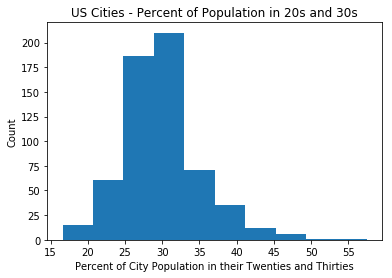

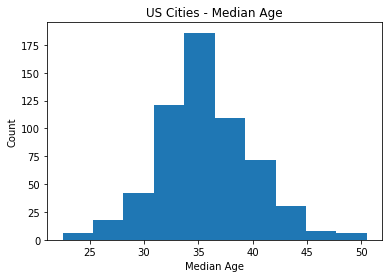

In [5]:
# histogram - percent of people in their 20s and 30s 

pct_target_age = dems_and_cider['Total_Estimate_Twenties_(Pct)'] + dems_and_cider['Total_Estimate_Thirties_(Pct)']

plt.hist(pct_target_age)
plt.xlabel('Percent of City Population in their Twenties and Thirties')
plt.ylabel('Count')
plt.title('US Cities - Percent of Population in 20s and 30s')
plt.show()

# histogram - median age 

median_age = dems_and_cider['Total_Estimate_SUMMARY_INDICATORS__Median_age_years']
plt.hist(median_age)
plt.xlabel('Median Age')
plt.ylabel('Count')
plt.title('US Cities - Median Age')
plt.show()


It looks like most cities have 25-33% of their population in their twenties and thirties, with a median age of around 35 years old. I am interested in cities with a particularly young population. I will examine below:

In [18]:
# Look at populations with highest % of population in 20s and 30s
dems_and_cider['Target_Age'] = dems_and_cider['Total_Estimate_Twenties_(Pct)'] + dems_and_cider['Total_Estimate_Thirties_(Pct)']
dems_and_cider.sort_values('Target_Age', ascending=False).head(5)

,Unnamed: 0,Id,Id2,Geography,Total_Estimate_Total_population,Male_Estimate_Total_population,Female_Estimate_Total_population,Total_Estimate_SUMMARY_INDICATORS__Median_age_years,Male_Estimate_SUMMARY_INDICATORS__Median_age_years,Female_Estimate_SUMMARY_INDICATORS__Median_age_years,...,Geo_Display_Label,City,State,Shipments_16,Total_Estimate_Children_(Pct),Total_Estimate_Twenties_(Pct),Total_Estimate_Thirties_(Pct),Total_Estimate_Forties_(Pct),Total_Estimate_Old_(Pct),Target_Age
338,339,1600000US2562535,2562535.0,"Somerville city, Massachusetts",81324.0,40098.0,41226.0,31.1,31.9,30.4,...,"Somerville city, Massachusetts",Somerville city,Massachusetts,3.887604e+06,12.9,33.2,24.3,9.5,19.9,57.5
551,552,1600000US4962470,4962470.0,"Provo city, Utah",116874.0,58285.0,58589.0,23.3,23.9,22.4,...,"Provo city, Utah",Provo city,Utah,1.192944e+06,28.7,42.9,9.8,5.6,13.1,52.7
280,281,1600000US1805860,1805860.0,"Bloomington city, Indiana",86654.0,43793.0,42861.0,23.6,23.9,23.2,...,"Bloomington city, Indiana",Bloomington city,Indiana,3.665585e+06,25.7,37.2,11.2,6.7,19.2,48.4
329,330,1600000US2511000,2511000.0,"Cambridge city, Massachusetts",110644.0,53974.0,56670.0,30.2,29.6,30.9,...,"Cambridge city, Massachusetts",Cambridge city,Massachusetts,3.887604e+06,18.7,30.9,17.3,9.6,23.6,48.2
291,292,1600000US1901855,1901855.0,"Ames city, Iowa",66190.0,34238.0,31952.0,23.5,24.3,22.7,...,"Ames city, Iowa",Ames city,Iowa,2.389414e+06,25.4,39.1,9.1,8.0,18.5,48.2


The cities with the highest percentages of their populations in their 20s and 30s are college towns, which make sense. The struggle with some of these towns might be that many college students have low to no income and are often burdened with student debt, which may affect their willingness to spend money on craft cider.

In [19]:
# Look at populations with lowest median age
dems_and_cider.sort_values('Total_Estimate_SUMMARY_INDICATORS__Median_age_years').head(5)

,Unnamed: 0,Id,Id2,Geography,Total_Estimate_Total_population,Male_Estimate_Total_population,Female_Estimate_Total_population,Total_Estimate_SUMMARY_INDICATORS__Median_age_years,Male_Estimate_SUMMARY_INDICATORS__Median_age_years,Female_Estimate_SUMMARY_INDICATORS__Median_age_years,...,Geo_Display_Label,City,State,Shipments_16,Total_Estimate_Children_(Pct),Total_Estimate_Twenties_(Pct),Total_Estimate_Thirties_(Pct),Total_Estimate_Forties_(Pct),Total_Estimate_Old_(Pct),Target_Age
501,502,1600000US4815976,4815976.0,"College Station city, Texas",112142.0,56766.0,55376.0,22.5,22.0,23.5,...,"College Station city, Texas",College Station city,Texas,2.016399e+07,30.4,35.7,11.3,8.7,13.9,47.0
431,432,1600000US3734200,3734200.0,"Jacksonville city, North Carolina",67795.0,38783.0,29012.0,23.1,22.1,25.7,...,"Jacksonville city, North Carolina",Jacksonville city,North Carolina,6.174013e+06,32.4,33.2,12.4,6.8,15.1,45.6
551,552,1600000US4962470,4962470.0,"Provo city, Utah",116874.0,58285.0,58589.0,23.3,23.9,22.4,...,"Provo city, Utah",Provo city,Utah,1.192944e+06,28.7,42.9,9.8,5.6,13.1,52.7
291,292,1600000US1901855,1901855.0,"Ames city, Iowa",66190.0,34238.0,31952.0,23.5,24.3,22.7,...,"Ames city, Iowa",Ames city,Iowa,2.389414e+06,25.4,39.1,9.1,8.0,18.5,48.2
280,281,1600000US1805860,1805860.0,"Bloomington city, Indiana",86654.0,43793.0,42861.0,23.6,23.9,23.2,...,"Bloomington city, Indiana",Bloomington city,Indiana,3.665585e+06,25.7,37.2,11.2,6.7,19.2,48.4


Unsurprisingly, there is a lot of overlap with the cities with the highest percentages of people in their 20s and 30s, and still a lot of college towns in the mix. 

### Sex Ratio

Next, I will examine the ratio of the number of males to the number of females. This is an important ratio, because cider has been shown to be more popular among the female population, according to the US Brewer's Association. 

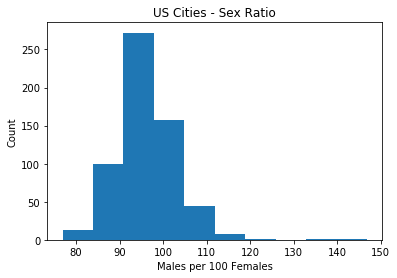

In [11]:

# histogram - sex ratio 

sex_ratio = dems_and_cider['Total_Estimate_SUMMARY_INDICATORS__Sex_ratio_males_per_100_females']
plt.hist(sex_ratio)
plt.xlabel('Males per 100 Females')
plt.ylabel('Count')
plt.title('US Cities - Sex Ratio')
plt.show()


As one might expect, most values fall between the 95-105 range -- approximately equal number of males and females. I'll examine which cities have the lowest number of males for every female.

In [13]:
dems_and_cider.sort_values('Total_Estimate_SUMMARY_INDICATORS__Sex_ratio_males_per_100_females').head(5)

,Unnamed: 0,Id,Id2,Geography,Total_Estimate_Total_population,Male_Estimate_Total_population,Female_Estimate_Total_population,Total_Estimate_SUMMARY_INDICATORS__Median_age_years,Male_Estimate_SUMMARY_INDICATORS__Median_age_years,Female_Estimate_SUMMARY_INDICATORS__Median_age_years,...,Geo_Display_Label,City,State,Shipments_16,Total_Estimate_Children_(Pct),Total_Estimate_Twenties_(Pct),Total_Estimate_Thirties_(Pct),Total_Estimate_Forties_(Pct),Total_Estimate_Old_(Pct),Target_Age
198,198,1600000US1207875,1207875.0,"Boynton Beach city, Florida",75569.0,32846.0,42723.0,43.9,45.4,41.3,...,"Boynton Beach city, Florida",Boynton Beach city,Florida,1.367503e+07,20.3,13.4,11.8,14.4,40.1,25.2
120,120,1600000US0659962,659962.0,"Redlands city, California",71288.0,31218.0,40070.0,34.5,35.2,33.8,...,"Redlands city, California",Redlands city,California,2.349916e+07,25.9,16.9,14.3,11.8,31.2,31.2
219,219,1600000US1239550,1239550.0,"Lauderhill city, Florida",71635.0,31512.0,40123.0,33.3,33.0,33.5,...,"Lauderhill city, Florida",Lauderhill city,Florida,1.367503e+07,32.0,12.9,15.6,11.5,28.1,28.5
535,536,1600000US4857200,4857200.0,"Pharr city, Texas",77314.0,34139.0,43175.0,31.1,30.4,31.5,...,"Pharr city, Texas",Pharr city,Texas,2.016399e+07,36.6,11.6,14.1,11.7,26.0,25.7
243,244,1600000US1276582,1276582.0,"Weston city, Florida",70023.0,31201.0,38822.0,40.7,39.1,42.2,...,"Weston city, Florida",Weston city,Florida,1.367503e+07,32.5,7.5,9.1,17.8,33.1,16.6


These are all smaller cities in warm places. 

### Population 

Finally, I will examine population. We need places with a high enough population to support a taproom, but Sociable's owners don't want to open a new business in too large of a city, which could prove to be difficult and expensive.

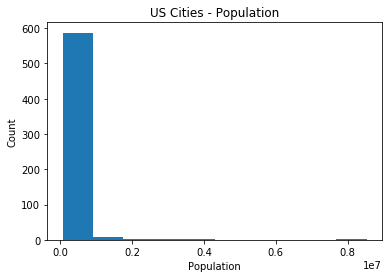

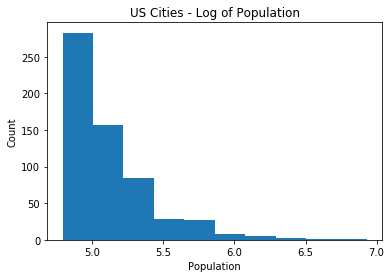

In [15]:

# histogram - population 

population = dems_and_cider['Total_Estimate_Total_population']
plt.hist(population)
plt.xlabel('Population')
plt.ylabel('Count')
plt.title('US Cities - Population')
plt.show()

population = np.log10(dems_and_cider['Total_Estimate_Total_population'])
plt.hist(population)
plt.xlabel('Population')
plt.ylabel('Count')
plt.title('US Cities - Log of Population')
plt.show()


This distribution is skewed to the right. Several outliers make it impossible to see trends, so I take the log to see a trend of many smaller cities, with a fair amount of larger cities as well. Let's take a look at those large cities. 

In [17]:
dems_and_cider.sort_values('Total_Estimate_Total_population', ascending = False).head(5)

,Unnamed: 0,Id,Id2,Geography,Total_Estimate_Total_population,Male_Estimate_Total_population,Female_Estimate_Total_population,Total_Estimate_SUMMARY_INDICATORS__Median_age_years,Male_Estimate_SUMMARY_INDICATORS__Median_age_years,Female_Estimate_SUMMARY_INDICATORS__Median_age_years,...,Geo_Display_Label,City,State,Shipments_16,Total_Estimate_Children_(Pct),Total_Estimate_Twenties_(Pct),Total_Estimate_Thirties_(Pct),Total_Estimate_Forties_(Pct),Total_Estimate_Old_(Pct),Target_Age
416,417,1600000US3651000,3651000.0,"New York city, New York",8537673.0,4075642.0,4462031.0,36.2,34.9,37.5,...,"New York city, New York",New York city,New York,1.074448e+07,23.3,16.3,15.9,12.9,31.7,32.2
91,91,1600000US0644000,644000.0,"Los Angeles city, California",3976324.0,1960672.0,2015652.0,35.6,34.8,36.4,...,"Los Angeles city, California",Los Angeles city,California,2.349916e+07,23.4,17.1,16.0,13.8,29.7,33.1
266,267,1600000US1714000,1714000.0,"Chicago city, Illinois",2704965.0,1313049.0,1391916.0,34.4,33.6,35.1,...,"Chicago city, Illinois",Chicago city,Illinois,8.581524e+06,23.8,18.2,16.9,12.7,28.6,35.1
515,516,1600000US4835000,4835000.0,"Houston city, Texas",2304388.0,1152283.0,1152105.0,33.0,32.4,33.5,...,"Houston city, Texas",Houston city,Texas,2.016399e+07,27.6,17.2,15.7,12.8,26.8,32.9
17,17,1600000US0455000,455000.0,"Phoenix city, Arizona",1615041.0,801784.0,813257.0,33.4,32.3,34.4,...,"Phoenix city, Arizona",Phoenix city,Arizona,4.401869e+06,29.7,15.2,14.8,13.0,27.2,30.0


While it is important to pick a city with a large enough population to support a new taproom, these extremely large cities may be dangerous, especially when starting out with Sociable's second ever taproom. These could be interesting places to look into later, when the model of expanding Sociable's name and influence has proven successful elsewhere. 

## Cluster Analysis 

I am performing a cluster analysis on the city data. I focus exclusively on large cities for this (those around the size of Minneapolis or larger), because that is Sociable's target population range. 

I find in my cluster analysis that there are three major clusters of cities. Let's examine these clusters based on the same demographic features above, to see which might be the most compelling cluster to recommend to Sociable. 

First, let's look at the cities in each cluster

In [27]:
# Import cluster dataframes

city_cluster_0 = pd.read_csv('city_cluster_0.csv')
city_cluster_1 = pd.read_csv('city_cluster_1.csv')
city_cluster_2 = pd.read_csv('city_cluster_2.csv')

print('cluster 0:')
print(city_cluster_0.City)

print('cluster 1:')
print(city_cluster_1.City)

print('cluster 2:')
print(city_cluster_2.City)

cluster 0:
0                                             Mesa city
1                                          Phoenix city
2                                           Tucson city
3                                           Fresno city
4                                       Sacramento city
5                                 Colorado Springs city
6                                     Jacksonville city
7                                            Miami city
8                           Indianapolis city (balance)
9     Louisville/Jefferson County metro government (...
10                                       Baltimore city
11                                         Detroit city
12                                     Kansas City city
13                                           Omaha city
14                                       Las Vegas city
15                                     Albuquerque city
16                                        Columbus city
17                                   

Now that we know which cities are in each cluster, let's examine their demographic features. 

### Income

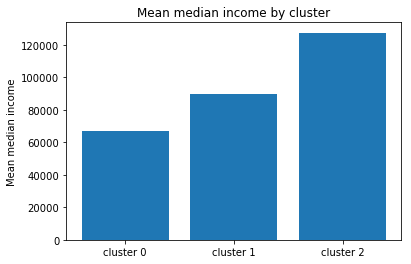

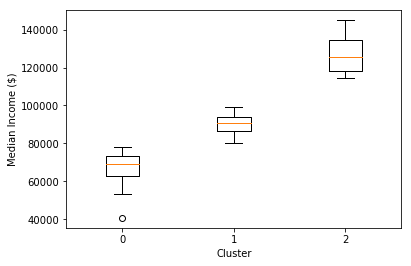

In [29]:
# Calculate mean income

c0_meanincome = (city_cluster_0.Households_Estimate_Mean_income_dollars.mean())
c1_meanincome = (city_cluster_1.Households_Estimate_Mean_income_dollars.mean())
c2_meanincome = (city_cluster_2.Households_Estimate_Mean_income_dollars.mean())

# Make a graph 
plt.bar(y_pos, [c0_meanincome, c1_meanincome, c2_meanincome])
plt.xticks(y_pos, labels)
plt.ylabel('Mean median income')
plt.title('Mean median income by cluster')
plt.show()

# Make boxplot 
mean_income_data = [city_cluster_0.Households_Estimate_Mean_income_dollars, 
                 city_cluster_1.Households_Estimate_Mean_income_dollars, 
                 city_cluster_2.Households_Estimate_Mean_income_dollars]

plt.boxplot(mean_income_data)
plt.xticks([1, 2, 3], ['0', '1', '2'])
plt.xlabel('Cluster')
plt.ylabel('Median Income ($)')
plt.show()



Cluster 2 has the highest incomes by far. However, the cities in this cluster are notoriously expensive (San Francisco, Washington DC, Seattle, San Jose). Cluster 1 also shows a very high median income distribution, and might be worth looking into. 

### Age

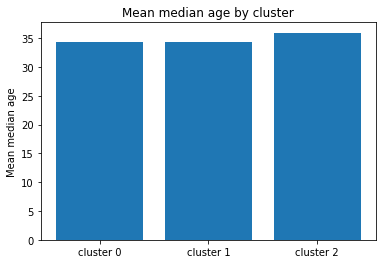

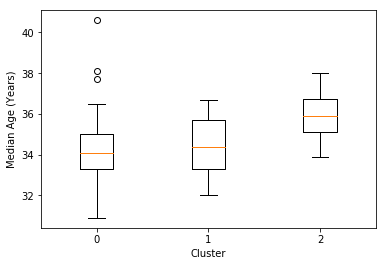

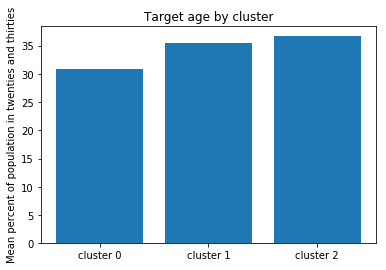

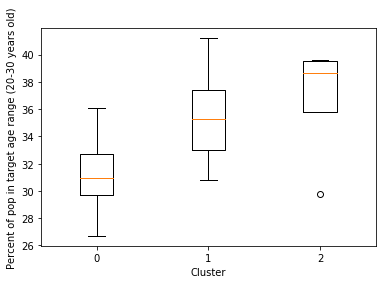

In [30]:
# Calculate mean median age in years

c0_meanage = city_cluster_0.Total_Estimate_SUMMARY_INDICATORS__Median_age_years.mean()
c1_meanage = (city_cluster_1.Total_Estimate_SUMMARY_INDICATORS__Median_age_years.mean())
c2_meanage = (city_cluster_2.Total_Estimate_SUMMARY_INDICATORS__Median_age_years.mean())

# Make a graph 
plt.bar(y_pos, [c0_meanage, c1_meanage, c2_meanage])
plt.xticks(y_pos, labels)
plt.ylabel('Mean median age')
plt.title('Mean median age by cluster')
plt.show()

# All clusters have about the same age range 

# Make boxplot 
mean_age_data = [city_cluster_0.Total_Estimate_SUMMARY_INDICATORS__Median_age_years, 
                 city_cluster_1.Total_Estimate_SUMMARY_INDICATORS__Median_age_years, 
                 city_cluster_2.Total_Estimate_SUMMARY_INDICATORS__Median_age_years]

plt.boxplot(mean_age_data)
plt.xticks([1, 2, 3], ['0', '1', '2'])
plt.xlabel('Cluster')
plt.ylabel('Median Age (Years)')
plt.show()

# Calculate mean twenties

c0_meantwenties = (city_cluster_0['Total_Estimate_Twenties_(Pct)'].mean())
c1_meantwenties = (city_cluster_1['Total_Estimate_Twenties_(Pct)'].mean())
c2_meantwenties = (city_cluster_2['Total_Estimate_Twenties_(Pct)'].mean())

# calculate mean thirties 

c0_meanthirties = (city_cluster_0['Total_Estimate_Thirties_(Pct)'].mean())
c1_meanthirties = (city_cluster_1['Total_Estimate_Thirties_(Pct)'].mean())
c2_meanthirties = (city_cluster_2['Total_Estimate_Thirties_(Pct)'].mean())

# Combine

c0_meantargetage = c0_meantwenties + c0_meanthirties
c1_meantargetage = c1_meantwenties + c1_meanthirties
c2_meantargetage = c2_meantwenties + c2_meanthirties

# make a graph

plt.bar(y_pos, [c0_meantargetage, c1_meantargetage, c2_meantargetage])
plt.xticks(y_pos, labels)
plt.ylabel('Mean percent of population in twenties and thirties')
plt.title('Target age by cluster')
plt.show()

# Make a box plot 
cluster_0_target = city_cluster_0['Total_Estimate_Twenties_(Pct)'] + city_cluster_0['Total_Estimate_Thirties_(Pct)']
cluster_1_target = city_cluster_1['Total_Estimate_Twenties_(Pct)'] + city_cluster_1['Total_Estimate_Thirties_(Pct)']
cluster_2_target = city_cluster_2['Total_Estimate_Twenties_(Pct)'] + city_cluster_2['Total_Estimate_Thirties_(Pct)']

target_age_data = [cluster_0_target, cluster_1_target, cluster_2_target]


plt.boxplot(target_age_data)
plt.xticks([1, 2, 3], ['0', '1', '2'])
plt.xlabel('Cluster')
plt.ylabel('Percent of pop in target age range (20-30 years old)')
plt.show()


All clusters are fairly similar here, although once again, clusters 1 and 2 have the edge over cluster 0. 

### Sex Ratio 

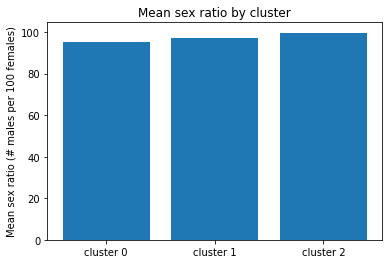

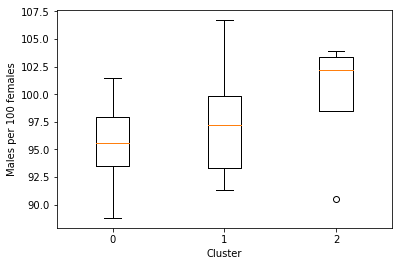

In [31]:
# calculate mean sex ratio 

c0_meansexratio = (city_cluster_0.Total_Estimate_SUMMARY_INDICATORS__Sex_ratio_males_per_100_females.mean())
c1_meansexratio = (city_cluster_1.Total_Estimate_SUMMARY_INDICATORS__Sex_ratio_males_per_100_females.mean())
c2_meansexratio = (city_cluster_2.Total_Estimate_SUMMARY_INDICATORS__Sex_ratio_males_per_100_females.mean())

# Make a graph 

plt.bar(y_pos, [c0_meansexratio, c1_meansexratio, c2_meansexratio])
plt.xticks(y_pos, labels)
plt.ylabel('Mean sex ratio (# males per 100 females)')
plt.title('Mean sex ratio by cluster')
plt.show()

# Make a box plot 

sex_ratio_data = [city_cluster_0.Total_Estimate_SUMMARY_INDICATORS__Sex_ratio_males_per_100_females, 
                 city_cluster_1.Total_Estimate_SUMMARY_INDICATORS__Sex_ratio_males_per_100_females, 
                 city_cluster_2.Total_Estimate_SUMMARY_INDICATORS__Sex_ratio_males_per_100_females]

plt.boxplot(sex_ratio_data)
plt.xticks([1, 2, 3], ['0', '1', '2'])
plt.xlabel('Cluster')
plt.ylabel('Males per 100 females')
plt.show()

Once again, these cities are all extremely similar. Cluster 0 and Cluster 1 have preferred sex ratio distributions over cluster 2, but all three are so similar in their mean sex ratio that the population of males versus females in cities does not seem to be an important factor in distinguishing clusters. 

### Population

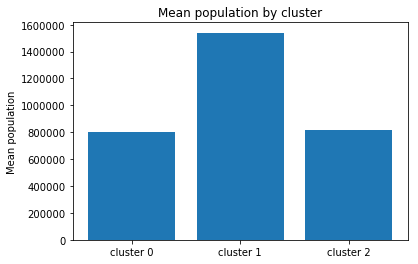

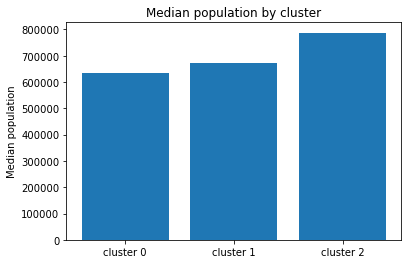

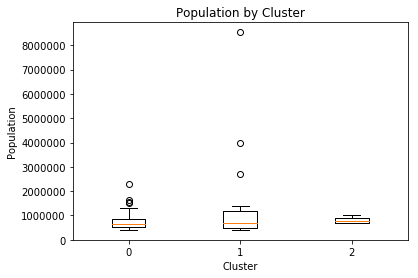

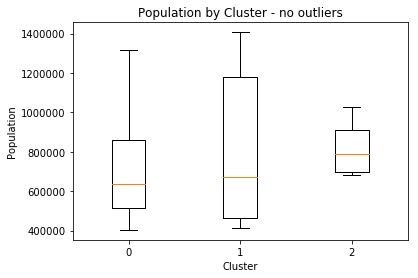

In [36]:
# Calculate mean pop
c0_meanpop = city_cluster_0.Total_Estimate_Total_population.mean()
c1_meanpop = city_cluster_1.Total_Estimate_Total_population.mean()
c2_meanpop = city_cluster_2.Total_Estimate_Total_population.mean()

# Make a graph 
labels = ['cluster 0', 'cluster 1', 'cluster 2']
y_pos = np.arange(len(labels))
plt.bar(y_pos, [c0_meanpop, c1_meanpop, c2_meanpop])
plt.xticks(y_pos, labels)
plt.ylabel('Mean population')
plt.title('Mean population by cluster')
plt.show()

# Calculate median pop

c0_medpop = city_cluster_0.Total_Estimate_Total_population.median()
c1_medpop = city_cluster_1.Total_Estimate_Total_population.median()
c2_medpop = city_cluster_2.Total_Estimate_Total_population.median()

# Make a graph 
labels = ['cluster 0', 'cluster 1', 'cluster 2']
y_pos = np.arange(len(labels))
plt.bar(y_pos, [c0_medpop, c1_medpop, c2_medpop])
plt.xticks(y_pos, labels)
plt.ylabel('Median population')
plt.title('Median population by cluster')
plt.show()

# Make a box plot

population_data = [city_cluster_0.Total_Estimate_Total_population, city_cluster_1.Total_Estimate_Total_population, city_cluster_2.Total_Estimate_Total_population]

plt.boxplot(population_data)
plt.xticks([1, 2, 3], ['0', '1', '2'])
plt.xlabel('Cluster')
plt.ylabel('Population')
plt.title('Population by Cluster')
plt.show()

# Don't show outliers

plt.boxplot(population_data, showfliers = False)
plt.xticks([1, 2, 3], ['0', '1', '2'])
plt.xlabel('Cluster')
plt.ylabel('Population')
plt.title('Population by Cluster - no outliers')
plt.show()




All three clusters have similar populations. Cluster 1 has many of the cities with the largest populations, like New York City and Los Angeles. However, we shouldn't avoid the cluster on this basis, because it has a large range of populations. This might be beneficial: we could find cities that are similar to a New York City or an LA without the high costs and high competition.  

### Conclusions 

After examining the demographic patterns of the clusters above, I would lean towards recommending a city from Cluster 1 or 2 to Sociable CiderWerks for their new taproom. These cities have populations with high median incomes and many people who are in their 20s and 30s. However, it is also clear from the graphs above that all of these cities are very similar. 

My next steps will have to include cidery performance data to see if these clusters based on demographic features show a demonstrable difference in ability to support craft cider businesses.